# Algoritma PageRank

Algoritma PageRank adalah algoritma yang berfungsi menentukan situs web yang lebih penting atau populer.

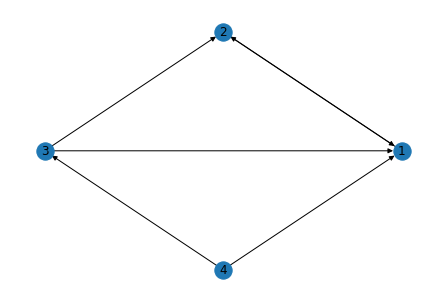

In [12]:
#mempersiapkan library
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

#mendefinisikan array
myWeb = nx.DiGraph()
myPages = range(1,4)

#menarik garis koneksi
connections = [(1,2),(2,1),(3,1),(3,2),(4,1),(4,3)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

#melakukan plotting
pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [13]:
def createPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_matrix(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(
        [1.0/count
        if count>0 else 0.0 for count in outwards])
    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set)/float(nodes_set)
    if np.min(np.sum(G,axis=0)) < 1.0:
        print('WARN: G is Substochastic')
    return G,p

In [14]:
G,p = createPageRank(myWeb)
print(G)

[[0.  1.  0.5 0.5]
 [1.  0.  0.5 0. ]
 [0.  0.  0.  0.5]
 [0.  0.  0.  0. ]]
